In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib
import plot_utils

# matplotlib.rcParams.update({
#   'pgf.texsystem': 'pdflatex',
#   'font.family': 'serif',
#   'text.usetex': True,
#   'pgf.rcfonts': False,
# })

QUERY_LOG_PATH = './query-log/'

LIST_NUM_THREADS = [1]
MACHINES = ['hausberg']



DATA_NAME = 'imdb'
WORKLOAD_NAME = 'job'

# DATA_NAME = 'tpch-sf1'
# WORKLOAD_NAME = 'tpch'

df = plot_utils.collect_data(QUERY_LOG_PATH, DATA_NAME, WORKLOAD_NAME, MACHINES, LIST_NUM_THREADS,
  ['duckdb', 'sip', 'rpt', 'rpt++'])
df.to_csv(f'{WORKLOAD_NAME}-dump.csv', index=False)
df


[NEW] competitor_type=duckdb
tag=imdb

folder=imdb
token=job
Found: job
>>>>> MACHINE=hausberg
num_threads=1
token=hausberg-1-threads
#### workload_threads_dir=hausberg-1-threads
key=()
key=()
exp_dirs={(): 'duckdb-20250306-14-05-54'}
config=(), exp_dir=duckdb-20250306-14-05-54
!!!! mode=cold!!!!!
3.66897
2.887492
2.850901
5.09802
3.48294
0.491249
2.986583
2.334131
4.895182
2.833153
0.28517
2.286379
1.392365
1.725626
0.731613
2.671965
5.068411
3.217012
2.694426
2.537646
1.775027
0.770618
4.797693
6.552104
3.546162
3.099919
3.524499
2.614068
5.931997
0.574991
3.038155
2.696464
13.911187
1.70547
3.133093
0.449618
0.488838
6.035557
0.801354
0.378254
3.255503
2.617386
0.512422
0.028377
1.5268
3.384641
5.06816
3.277431
5.642889
1.800886
2.848354
3.285636
0.706363
2.967323
3.491986
2.56315
2.721206
5.741838
0.573656
2.599837
0.517287
2.971798
2.709193
2.825883
0.597879
4.984822
4.056997
2.889534
4.925527
1.804435
0.487548
3.127672
4.602651
0.529238
3.051378
5.843258
11.51472
5.436691
0.7719

,competitor-type,db-file,config,mode,num-threads,query,latency (s),extra-optimization-time (ns)
0,duckdb,imdb,duckdb,cold,1,28a,3.668970,None
1,duckdb,imdb,duckdb,cold,1,9b,2.887492,None
2,duckdb,imdb,duckdb,cold,1,15b,2.850901,None
3,duckdb,imdb,duckdb,cold,1,31a,5.098020,None
4,duckdb,imdb,duckdb,cold,1,6d,3.482940,None
...,...,...,...,...,...,...,...,...
221,rpt++,imdb,rpt++,hot,1,31c,1.950134,None
222,rpt++,imdb,rpt++,hot,1,17d,0.648067,None
223,rpt++,imdb,rpt++,hot,1,26c,0.889150,None
224,rpt++,imdb,rpt++,hot,1,31b,1.785421,None


In [2]:
df

,competitor-type,db-file,config,mode,num-threads,query,latency (s),extra-optimization-time (ns)
0,duckdb,imdb,duckdb,cold,1,28a,3.668970,None
1,duckdb,imdb,duckdb,cold,1,9b,2.887492,None
2,duckdb,imdb,duckdb,cold,1,15b,2.850901,None
3,duckdb,imdb,duckdb,cold,1,31a,5.098020,None
4,duckdb,imdb,duckdb,cold,1,6d,3.482940,None
...,...,...,...,...,...,...,...,...
221,rpt++,imdb,rpt++,hot,1,31c,1.950134,None
222,rpt++,imdb,rpt++,hot,1,17d,0.648067,None
223,rpt++,imdb,rpt++,hot,1,26c,0.889150,None
224,rpt++,imdb,rpt++,hot,1,31b,1.785421,None


In [3]:
__configs__ = [
  # 'sip',
  'rpt',
  'rpt++'
  # 'parachute-16-0-1-3-0',
  # 'sip_parachute-16-0-1-2-0',
]

def get_config_color(config):
  if config.startswith('sip_parachute'):
    if config.endswith('2-0'):
      return '#CC0000' # red.
  elif config.startswith('parachute'):
    if config.endswith('2-0'):
      return '#964B00' # brown
    if config.endswith('3-0'):
      return '#964B00'
      # return '#CC0000' # red.
  return 'black'

In [4]:
import re

def extract_query_prefix(query):
    match = re.match(r'(\d+)', query)
    return match.group(1) if match else query

def process_data(df, mode, num_threads, selected_configs=None):
    filtered_df = df[(df['mode'] == mode) & (df['num-threads'] == num_threads)].copy()

    print(filtered_df)
    filtered_df.to_csv('mytest.csv', index=False)

    filtered_df['query_prefix'] = filtered_df['query'].apply(extract_query_prefix)

    # Sort the query prefix.
    filtered_df['query_prefix'] = filtered_df['query_prefix'].astype(int)
    filtered_df = filtered_df.sort_values(by='query_prefix')

    my_configs = selected_configs if selected_configs else filtered_df['config'].unique().tolist()
    my_configs = ['duckdb'] + [cfg for cfg in my_configs if cfg != 'duckdb']
    filtered_df = filtered_df[filtered_df['config'].isin(my_configs)]
    
    grouped = filtered_df.groupby(['query_prefix', 'config'])['latency (s)'].sum().unstack()
    duckdb_runtimes = grouped['duckdb']

    grouped.to_csv('newtest.csv')

    normalized_data = grouped.div(duckdb_runtimes, axis=0)
    
    normalized_data.to_csv('newtest-wow.csv')

    return normalized_data, list(grouped.index), my_configs

    competitor-type db-file  config mode  num-threads query  latency (s)  \
113          duckdb    imdb  duckdb  hot            1   28a     1.319055   
114          duckdb    imdb  duckdb  hot            1    9b     1.139680   
115          duckdb    imdb  duckdb  hot            1   15b     0.660296   
116          duckdb    imdb  duckdb  hot            1   31a     1.704420   
117          duckdb    imdb  duckdb  hot            1    6d     2.334267   
..              ...     ...     ...  ...          ...   ...          ...   
221           rpt++    imdb   rpt++  hot            1   31c     1.950134   
222           rpt++    imdb   rpt++  hot            1   17d     0.648067   
223           rpt++    imdb   rpt++  hot            1   26c     0.889150   
224           rpt++    imdb   rpt++  hot            1   31b     1.785421   
225           rpt++    imdb   rpt++  hot            1   17e     1.306647   

    extra-optimization-time (ns)  
113                         None  
114              

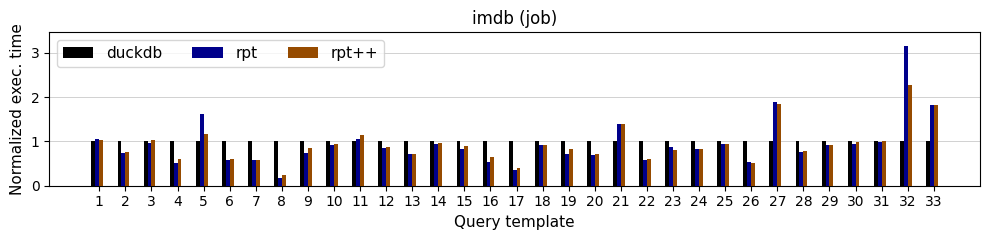

In [5]:
import numpy as np
import matplotlib.pyplot as plt

FIG_WIDTH, FIG_HEIGHT = 10, 2.5

def get_fontsize(msg):
  if msg == 'legend':
    return 11
  if msg == 'x-ticks':
    return 9
  if msg == 'y-ticks':
    return 9
  return 11

variant_colors = {
  'rpt': '#00008B',
  'rpt++': '#964B00',
  'duckdb': 'black'
}

rename_dict = {
  'rpt': r'rpt',
  'rpt++': r'rpt++',
}

def plot_normalized_runtimes(df, mode, num_threads, selected_configs=None):
    normalized_data, sorted_queries, selected_configs = process_data(df, mode, num_threads, selected_configs)
    
    print(normalized_data)
    print(sorted_queries)

    fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT))
    x_positions = np.arange(len(sorted_queries))
    bar_width = 0.15
    
    for i, config in enumerate(selected_configs):
        values = normalized_data[config].fillna(0).values

        # test = normalized_data['query_prefix']

        print(f'values={values}')

        color = variant_colors.get(config, '#666666')
        label = rename_dict.get(config, config)  # Rename using dict
        ax.bar(x_positions + (i - len(selected_configs) / 2) * bar_width, values, color=color, width=bar_width, label=label, zorder=3)
    
    ax.set_xticks(x_positions)
    ax.set_xticklabels(sorted_queries, rotation=0, ha='center')
    ax.set_xlabel('Query template', fontsize=get_fontsize('label'))
    ax.set_ylabel(r'Normalized exec. time', fontsize=get_fontsize('label'))

    anchor = (0.5, 1.225)
    ax.legend(
        loc='best', fontsize=get_fontsize('legend'),
        ncol=5)

    # ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    max_value = max(normalized_data[selected_configs].max().max(), 1)  # Ensure at least 1
    wiggle_room = 0.1 * max_value  # Add 10% extra space
    ax.set_ylim(0, max_value + wiggle_room)

    ax.grid(True, axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.5, zorder=0)
    ax.set_title(f'{DATA_NAME} ({WORKLOAD_NAME})')

    fig.savefig(f"{WORKLOAD_NAME}-queries-plot.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01, dpi=300)

    plt.tight_layout()
    plt.show()

plot_normalized_runtimes(df, mode='hot', num_threads=1, selected_configs=__configs__)